<H1 style="color:#512DA8;" style="font-family:Verdana">PCA</H1>
<p style="font-family:Verdana">Learn about PCA and how it can be leveraged to extract information from the data without any supervision using two popular datasets: Breast Cancer and CIFAR-10.</p>

<H2 style="color:#536DFE;"style="font-family:Verdana">Introduction</H2>
<p style="font-family:Verdana">Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.</p>
<p style="font-family:Verdana">Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.</p>
<p style="font-family:Verdana">One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels), and you will learn how to achieve this practically using Python in later sections of this tutorial!</p>

<p style="font-family:Verdana"><b>Note:</b> Features, Dimensions, and Variables are all referring to the same thing. You will find them being used interchangeably.</p>

<p style="font-family:Verdana"><b>But where all you can apply PCA?</b></p>

<ul style="font-family:Verdana">
    <li><b style="color:#43A047;">Data Visualization:</b> When working on any data related problem, the challenge in today's world is the sheer volume of data, and the variables/features that define that data. To solve a problem where data is the key, you need extensive data exploration like finding out how the variables are correlated or understanding the distribution of a few variables. Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible.<br><br>Hence, PCA can do that for you since it projects the data into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space with a naked eye.
    <br><br>
    </li>
  <li><b style="color:#43A047;">Speeding Machine Learning (ML) Algorithm:</b> Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.
</li>
</ul>

<p style="font-family:Verdana">At an abstract level, you take a dataset having many features, and you simplify that dataset by selecting a few <span style="background-color:#B0BEC5"><span style="font-family:Consolas">Principal Components</span></span> from original features.
</p>

<H2 style="color:#F57F17;"style="font-family:Verdana">What is a Principal Component?</H2>
<p style="font-family:Verdana">Principal components are the key to PCA; they represent what's underneath the hood of your data. In a layman term, when the data is projected into a lower dimension (assume three dimensions) from a higher space, the three dimensions are nothing but the three Principal Components that captures (or holds) most of the variance (information) of your data.</p>

<H2 style="color:#00796B;"style="font-family:Verdana">Understanding the Data</H2>
<p style="font-family:Verdana"><b>Breast Cancer</b></p>
<p style="font-family:Verdana">The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.</p>
<p style="font-family:Verdana">The malignant class has 212 samples, whereas the benign class has 357 samples.</p>
<p style="font-family:Verdana">It has 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.</p>

<p style="font-family:Verdana"><b>CIFAR - 10</b></p>
<p style="font-family:Verdana">The CIFAR-10 (Canadian Institute For Advanced Research) dataset consists of 60,000 images each of 32x32x3 color images having ten classes, with 6,000 images per category.</p>
<p style="font-family:Verdana">The dataset consists of 50,000 training images and 10,000 test images.</p>
<p style="font-family:Verdana">The classes in the dataset are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.</p>

<H2 style="color:#311B92;"style="font-family:Verdana">Data Exploration</H2>
<p style="font-family:Verdana">Now you will be loading and analyzing the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">Breast Cancer</span></span> and <span style="background-color:#E0E0E0"><span style="font-family:Consolas">CIFAR-10</span></span> datasets. By now you have an idea regarding the dimensionality of both datasets.</p>

<p style="font-family:Verdana"><b>Breast Cancer Data Exploration</b></p>

In [1]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

# Data Matrix
breast_data = breast.data
print("Data shape:", breast_data.shape)

# Target Matrix
breast_labels = breast.target
print("Label shape:",breast_labels.shape)


Data shape: (569, 30)
Label shape: (569,)


<p style="font-family:Verdana">Now you will import <span style="background-color:#E0E0E0"><span style="font-family:Consolas">numpy</span></span> since you will be reshaping the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">breast_labels</span></span> to concatenate it with the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">breast_data</span></span> so that you can finally create a <span style="background-color:#E0E0E0"><span style="font-family:Consolas">DataFrame</span></span> which will have both the data and labels.</p>



In [2]:
import numpy as np
labels = np.reshape(breast_labels,(569,1))
print("New Label shape:",labels.shape)

New Label shape: (569, 1)


<p style="font-family:Verdana">After <span style="background-color:#E0E0E0"><span style="font-family:Consolas">reshaping</span></span> the labels, you will <span style="background-color:#E0E0E0"><span style="font-family:Consolas">concatenate</span></span> the data and labels along the second axis, which means the final shape of the array will be <span style="background-color:#E0E0E0"><span style="font-family:Consolas">569 x 31</span></span>

In [3]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)
print("Final Dataframe shape:",final_breast_data.shape)

Final Dataframe shape: (569, 31)


<p style="font-family:Verdana">Now you will import <span style="background-color:#E0E0E0"><span style="font-family:Consolas">pandas</span></span> to create the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">DataFrame</span></span> of the final data to represent the data in a tabular fashion.</p>



In [4]:
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data)
breast_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


<p style="font-family:Verdana">Let's quickly print the features that are there in the breast cancer dataset!</p>

In [5]:
features = breast.feature_names
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<p style="font-family:Verdana">If you note in the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">features</span></span> array, the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">label</span></span> field is missing. Hence, you will have to manually add it to the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">features</span></span> array since you will be equating this array with the column names of your <span style="background-color:#E0E0E0"><span style="font-family:Consolas">breast_dataset</span></span> dataframe.</p>



In [6]:
features_labels = np.append(features,'label')
print(features_labels)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension' 'label']


<p style="font-family:Verdana">Great! Now you will embed the column names to the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">breast_dataset</span></span> dataframe.</p>

In [7]:
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


<p style="font-family:Verdana">Since the original labels are in <span style="background-color:#E0E0E0"><span style="font-family:Consolas">0,1</span></span> format, you will change the labels to <span style="background-color:#E0E0E0"><span style="font-family:Consolas">benign</span></span> and <span style="background-color:#E0E0E0"><span style="font-family:Consolas">malignant</span></span> using <span style="background-color:#E0E0E0"><span style="font-family:Consolas">.replace</span></span> function. You will use <span style="background-color:#E0E0E0"><span style="font-family:Consolas">inplace=True</span></span> which will modify the dataframe breast_dataset.</p>



In [8]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


<p style="font-family:Verdana"><b>CIFAR - 10 Data Exploration</b></p>

In [9]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

<p style="font-family:Verdana">Let's quickly print the shape of training and testing images shape.</p>

In [10]:
print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


<p style="font-family:Verdana">Let's also print the shape of the labels.</p>

In [11]:
print('Training label shape:', y_train.shape)
print('Testing label shape:', y_test.shape)

Training label shape: (50000, 1)
Testing label shape: (10000, 1)


<p style="font-family:Verdana">Let's also find out the total number of labels and the various kinds of classes the data has.</p>

In [12]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


<p style="font-family:Verdana">Now to plot the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">CIFAR-10</span></span> images<br><br>For a better understanding, let's create a dictionary that will have class names with their corresponding categorical class labels.</p>

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


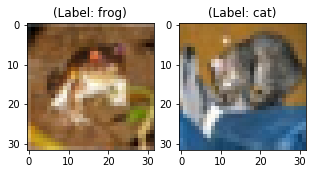

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

<H2 style="color:#512DA8;" style="font-family:Verdana">Data Visualization using PCA</H2>
<p style="font-family:Verdana">Now comes the most exciting part of this tutorial. As you learned earlier that PCA projects turn high-dimensional data into a low-dimensional principal component, now is the time to visualize that with the help of Python!</p>
<p style="font-family:Verdana"><b>Visualizing the Breast Cancer data</b></p>

<p style="font-family:Verdana">You start by <span style="background-color:#E0E0E0"><span style="font-family:Consolas">Standardizing</span></span> the data since PCA's output is influenced based on the scale of the features of the data.</p>

<p style="font-family:Verdana">It is a common practice to normalize your data before feeding it to any machine learning algorithm.</p>

<p style="font-family:Verdana">To apply normalization, you will import <span style="background-color:#E0E0E0"><span style="font-family:Consolas">StandardScaler</span></span> module from the sklearn library and select only the features from the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">breast_dataset</span></span> you created in the Data Exploration step. Once you have the features, you will then apply scaling by doing <span style="background-color:#E0E0E0"><span style="font-family:Consolas">fit_transform</span></span> on the feature data.</p>

<p style="font-family:Verdana">While applying <span style="background-color:#E0E0E0"><span style="font-family:Consolas">StandardScaler</span></span>, each feature of your data should be normally distributed such that it will scale the distribution to a mean of 0 and a standard deviation of 1.</p>

In [14]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x_norm = StandardScaler().fit_transform(x) # normalizing the features
print("x norm shape: ", x_norm.shape)

x norm shape:  (569, 30)


<p style="font-family:Verdana">Let's check whether the normalized data has a mean of 0 and a standard deviation of 1.</p>

In [15]:
print("Mean: ",np.mean(x_norm))
print("STD: ",np.std(x_norm))

Mean:  -6.826538293184326e-17
STD:  1.0


<p style="font-family:Verdana">Let's convert the normalized features into a tabular format with the help of DataFrame.</p>

In [16]:
feat_cols = ['feature'+str(i) for i in range(x_norm.shape[1])]
normalised_breast = pd.DataFrame(x_norm,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


<p style="font-family:Verdana">Now comes the critical part, the next few lines of code will be projecting the 30-dimensional Breast Cancer data to 2-dimensional <span style="background-color:#E0E0E0"><span style="font-family:Consolas">principal components</span></span>.</p>

In [54]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(normalised_breast)

<p style="font-family:Verdana">Next, let's create a DataFrame that will have the principal component values for all 569 samples.</p>

In [56]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, 
                                   columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


<p style="font-family:Verdana">Once you have the principal components, you can find the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">explained_variance_ratio</span></span>. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.
</p>

In [57]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


<p style="font-family:Verdana">From the above output, you can observe that the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">principal component 1</span></span> holds 44.2% of the information while the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">principal component 2</span></span> holds only 19% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.
</p>

<p style="font-family:Verdana">Let's plot the visualization of the 569 samples along the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">principal component 1</span></span> and <span style="background-color:#E0E0E0"><span style="font-family:Consolas">principal component 2</span></span> axis. It should give you good insight into how your samples are distributed among the two classes.
</p>

<Figure size 432x288 with 0 Axes>

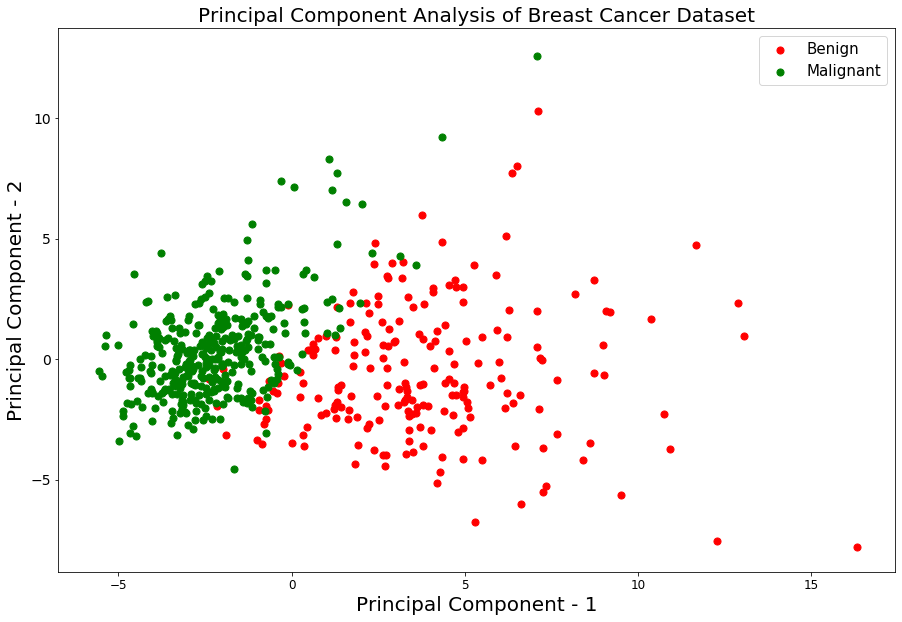

In [58]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(15,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)

targets = ['Benign', 'Malignant']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

<p style="font-family:Verdana">From the above graph, you can observe that the two classes <span style="background-color:#E0E0E0"><span style="font-family:Consolas">benign</span></span> and <span style="background-color:#E0E0E0"><span style="font-family:Consolas">malignant</span></span>, when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">benign</span></span> class is spread out as compared to the <span style="background-color:#E0E0E0"><span style="font-family:Consolas">malignant</span></span> class.</p>

In [59]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, 
                                   columns = ['principal component 1', 'principal component 2'])

principal_breast_Df['label'] = breast_dataset['label']
principal_breast_Df.tail()

,principal component 1,principal component 2,label
564,6.439315,-3.576817,Benign
565,3.793382,-3.584048,Benign
566,1.256179,-1.902297,Benign
567,10.374794,1.672010,Benign
568,-5.475243,-0.670637,Malignant


<p style="font-family:Verdana">Split the dataframe into train, validation, and test</p>

In [60]:
properties = list(principal_breast_Df.columns.values)
properties.remove('label')
X = principal_breast_Df[properties]
y = principal_breast_Df['label']

In [107]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels  = train_test_split(X, y, test_size=0.30)

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model,data,label):
    # Plot Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(model, 
                                                            data, 
                                                            label,
                                                            # Number of folds in cross-validation
                                                            cv=3,
                                                            # Evaluation metric
                                                            scoring='accuracy',
                                                            # Use all computer cores
                                                            n_jobs=-1, 
                                                            # 50 different sizes of the training set
                                                            train_sizes=np.linspace(0.01, 1.0, 150))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#ff0404",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#0404ff", label="Cross-validation score")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()

<H2 style="color:#512DA8;" style="font-family:Verdana"> Building and Evaluating Models for Breast Cancer</H2>
<p style="font-family:Verdana"><b>Naive Bayes</b></p>

Accuracy Score: 0.96
Cross Validaiton:  [0.825      0.9375     0.9375     0.88607595 0.92405063]


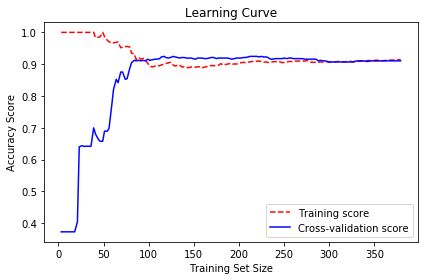

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)

# Evaluate accuracy
print("Accuracy Score: %.2f" % accuracy_score(test_labels, preds))
print("Cross Validaiton: ", cross_val_score(gnb,train,train_labels,cv=5, scoring="accuracy"))

# Plot Learning Curve
plot_learning_curve(gnb,X,y)
plt.show()

<p style="font-family:Verdana"><b>Stochastic Gradient Descent</b></p>

Accuracy Score: 0.86
Cross Validaiton:  [0.9        0.925      0.9625     0.91139241 0.96202532]


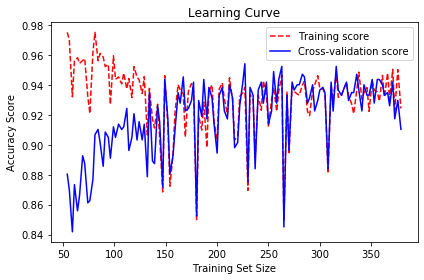

In [63]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Initialize our classifier
sgd_clf = SGDClassifier(max_iter=1000)

# Train our classifier
sgd_clf.fit(train,train_labels)

# Make predictions
preds = sgd_clf.predict(test)

# Evaluate accuracy
print("Accuracy Score: %.2f" % accuracy_score(test_labels, preds))
print("Cross Validaiton: ", cross_val_score(sgd_clf,train,train_labels,cv=5, scoring="accuracy"))

# Plot Learning Curve
plot_learning_curve(sgd_clf,X,y)
plt.show()

<p style="font-family:Verdana"><b>Random Forest Classifier</b></p>

Accuracy Score: 0.95
Cross Validaiton:  [0.8875     0.9125     0.95       0.93670886 0.96202532]


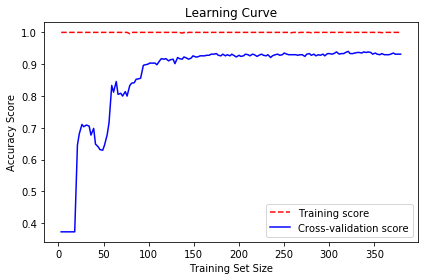

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Initialize our classifier
forest_clf = RandomForestClassifier()

# Train our classifier
forest_clf.fit(train,train_labels)

# Make predictions
preds = forest_clf.predict(test)

# Evaluate accuracy
print("Accuracy Score: %.2f" % accuracy_score(test_labels, preds))
print("Cross Validaiton: ", cross_val_score(forest_clf,train,train_labels,cv=5, scoring="accuracy"))

# Plot Learning Curve
plot_learning_curve(forest_clf,X,y)
plt.show()

<p style="font-family:Verdana"><b>Logistic Regression</b></p>

Accuracy Score: 0.96
Cross Validaiton:  [0.925      0.925      0.9625     0.93670886 0.97468354]


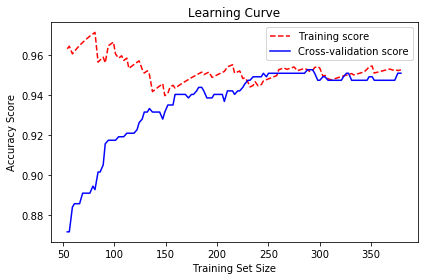

In [65]:
from sklearn.linear_model import LogisticRegression

# Initialize our classifier
log_reg = LogisticRegression(C=10)

# Train our classifier
log_reg.fit(train, train_labels)

# Make predictions
preds = log_reg.predict(test)

# Evaluate accuracy
print("Accuracy Score: %.2f" % accuracy_score(test_labels, preds))
print("Cross Validaiton: ", cross_val_score(log_reg,train,train_labels,cv=5, scoring="accuracy"))

# Plot Learning Curve
plot_learning_curve(log_reg,X,y)
plt.show()

<p style="font-family:Verdana"><b>Softmax Regression</b></p>

Accuracy Score: 0.96
Cross Validaiton:  [0.925      0.925      0.9625     0.93670886 0.97468354]


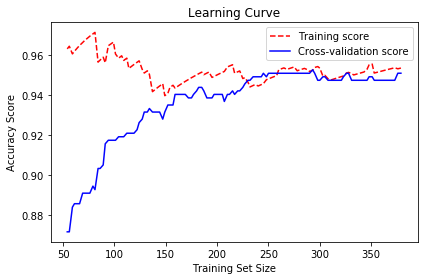

In [99]:
# Initialize our classifier
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)

# Train our classifier
softmax_reg.fit(train, train_labels)

# Make predictions
preds = softmax_reg.predict(test)

# Evaluate accuracy
print("Accuracy Score: %.2f" % accuracy_score(test_labels, preds))
print("Cross Validaiton: ", cross_val_score(softmax_reg,train,train_labels,cv=5, scoring="accuracy"))

# Plot Learning Curve
plot_learning_curve(softmax_reg,X,y)
plt.show()

<p style="font-family:Verdana"><b>SVM</b></p>

Accuracy Score: 0.95
Cross Validaiton:  [0.925      0.9        0.9125     0.93670886 0.97468354]


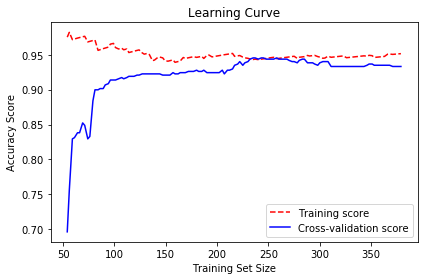

In [88]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

# Initialize our classifier
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=4)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=5, loss="hinge", max_iter=100000))
    ])

# Train our classifier
polynomial_svm_clf.fit(train, train_labels)

# Make predictions
preds = polynomial_svm_clf.predict(test)

# Evaluate accuracy
print("Accuracy Score: %.2f" % accuracy_score(test_labels, preds))
print("Cross Validaiton: ", cross_val_score(polynomial_svm_clf,train,train_labels,cv=5, scoring="accuracy"))

# Plot Learning Curve
plot_learning_curve(polynomial_svm_clf,X,y)
plt.show()

<p ="fontstyle-family:Verdana"><b>Decision Tree</b></p>

Accuracy Score: 0.94
Cross Validaiton:  [0.875      0.9125     0.8875     0.92405063 0.93670886]


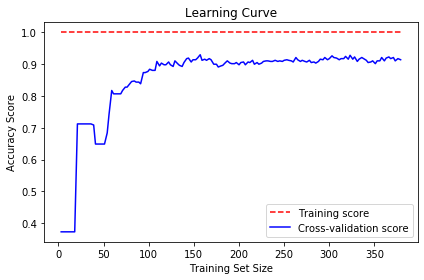

In [90]:
from sklearn.tree import DecisionTreeClassifier

# Initialize our classifier
tree_clf = DecisionTreeClassifier()

# Train our classifier
tree_clf.fit(train, train_labels)

# Make predictions
preds = tree_clf.predict(test)

# Evaluate accuracy
print("Accuracy Score: %.2f" % accuracy_score(test_labels, preds))
print("Cross Validaiton: ", cross_val_score(tree_clf,train,train_labels,cv=5, scoring="accuracy"))

# Plot Learning Curve
plot_learning_curve(tree_clf,X,y)
plt.show()

<p ="fontstyle-family:Verdana"><b>KNN</b></p>

Accuracy Score: 0.95
Cross Validaiton:  [0.9        0.9125     0.925      0.93670886 0.94936709]


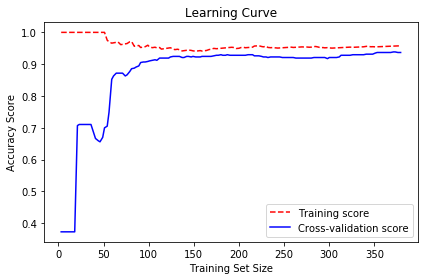

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
scaler.fit(train)

X_train = scaler.transform(train)
X_test = scaler.transform(test)


# Initialize our classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3)

# Train our classifier
knn_classifier.fit(train, train_labels)

# Make predictions
preds = knn_classifier.predict(test)

# Evaluate accuracy
print("Accuracy Score: %.2f" % accuracy_score(test_labels, preds))
print("Cross Validaiton: ", cross_val_score(knn_classifier,train,train_labels,cv=5, scoring="accuracy"))

# Plot Learning Curve
plot_learning_curve(knn_classifier,X,y)
plt.show()